# Image Thresholding for PDF Image Processing

This notebook demonstrates various thresholding techniques using OpenCV for PDF image processing. It covers both simple and advanced thresholding methods to segment and process images effectively. The goal is to provide a brief analysis on each of these techniques to images extracted from PDFs. 

Key sections include:
- Simple Thresholding
- Adaptive Thresholding
- Otsu's Binarization
- Practical Examples and Use Cases

We can use this notebook as a reference to test the various types of thresholding on the ML model.

In [94]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from skimage.metrics import structural_similarity as ssim


path_to_image = "signature_data\images\chicago_540.pdf_78.jpg"
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)

<>:9: SyntaxWarning: invalid escape sequence '\i'
<>:9: SyntaxWarning: invalid escape sequence '\i'
C:\Users\matth\AppData\Local\Temp\ipykernel_20040\1001319996.py:9: SyntaxWarning: invalid escape sequence '\i'
  path_to_image = "signature_data\images\chicago_540.pdf_78.jpg"


## Simple Thresholding

In simple thresholding, a constant threshold value is applied to every pixel in the image. If a pixel's intensity value is smaller than the threshold, it is set to `0`; otherwise, it is set to the maximum value. This process helps in binarizing an image by segmenting it based on pixel intensity.

To apply thresholding, the function `cv.threshold` from OpenCV is used. It takes the following parameters:

1. **Source Image**: This should be a grayscale image.
2. **Threshold Value**: This value determines the cutoff for pixel classification.
3. **Maximum Value**: The value to be assigned to pixels that exceed the threshold.
4. **Thresholding Type**: OpenCV provides five types of thresholding:
   - `cv.THRESH_BINARY`
   - `cv.THRESH_BINARY_INV`
   - `cv.THRESH_TRUNC`
   - `cv.THRESH_TOZERO`
   - `cv.THRESH_TOZERO_INV`
   

### cv.THRESH_BINARY

The `cv.THRESH_BINARY` thresholding method sets all pixel values above a specified threshold to the maximum value (usually 255) and all pixel values below it to 0, resulting in a binary image.

#### Parameters:
- **src**: Input grayscale image.
- **dst**: Output binary image.
- **T**: Threshold value. Pixels with values greater than \(T\) will be set to `maxValue`.
- **maxValue**: The value assigned to pixels that exceed the threshold.

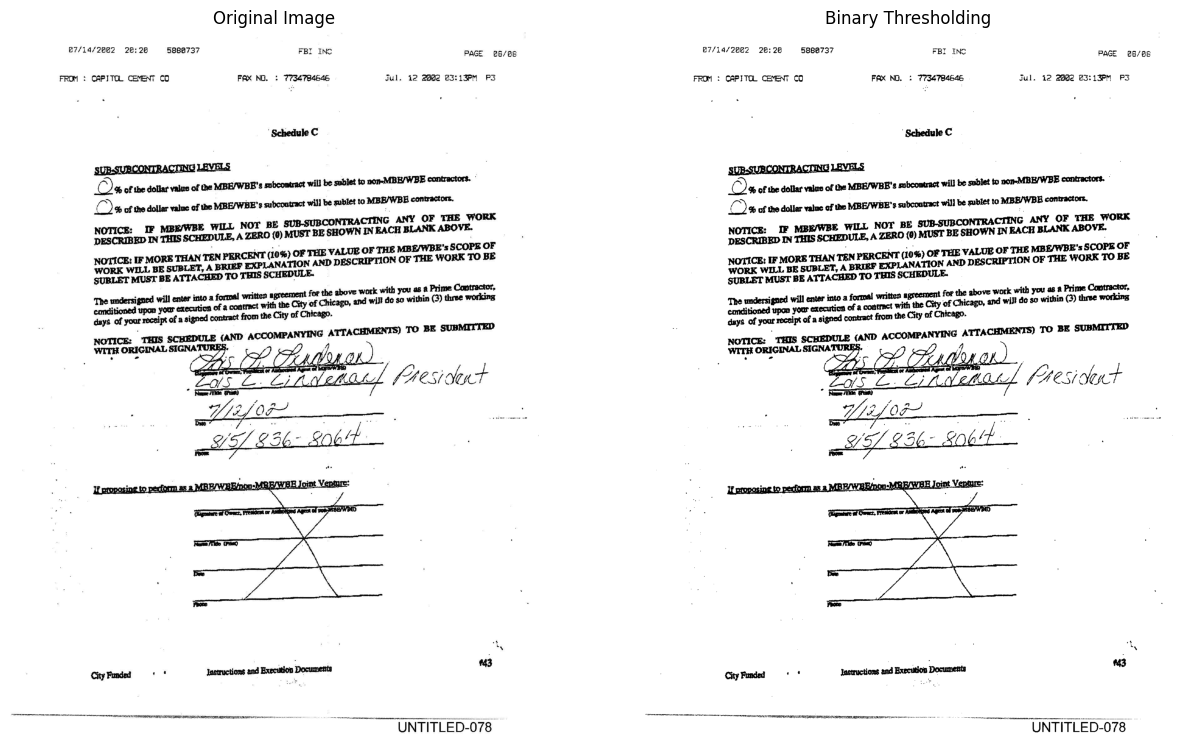

In [95]:

threshold_value = 127
max_value = 255  
_, binary = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_BINARY)

plt.figure(figsize=(15, 12))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Binary Thresholding')
plt.imshow(binary, cmap='gray')
plt.axis('off')

plt.show()

### cv.THRESH_BINARY_INV

The `cv.THRESH_BINARY_INV` is the inverse of the binary thresholding method, where pixel values below the threshold are set to the maximum value, and those above it are set to 0.

#### Parameters:
- **src**: Input grayscale image.
- **dst**: Output binary image. 
- **T**: Threshold value. Pixels with values greater than \(T\) will be set to 0.
- **maxValue**: The value assigned to pixels that exceed the threshold.


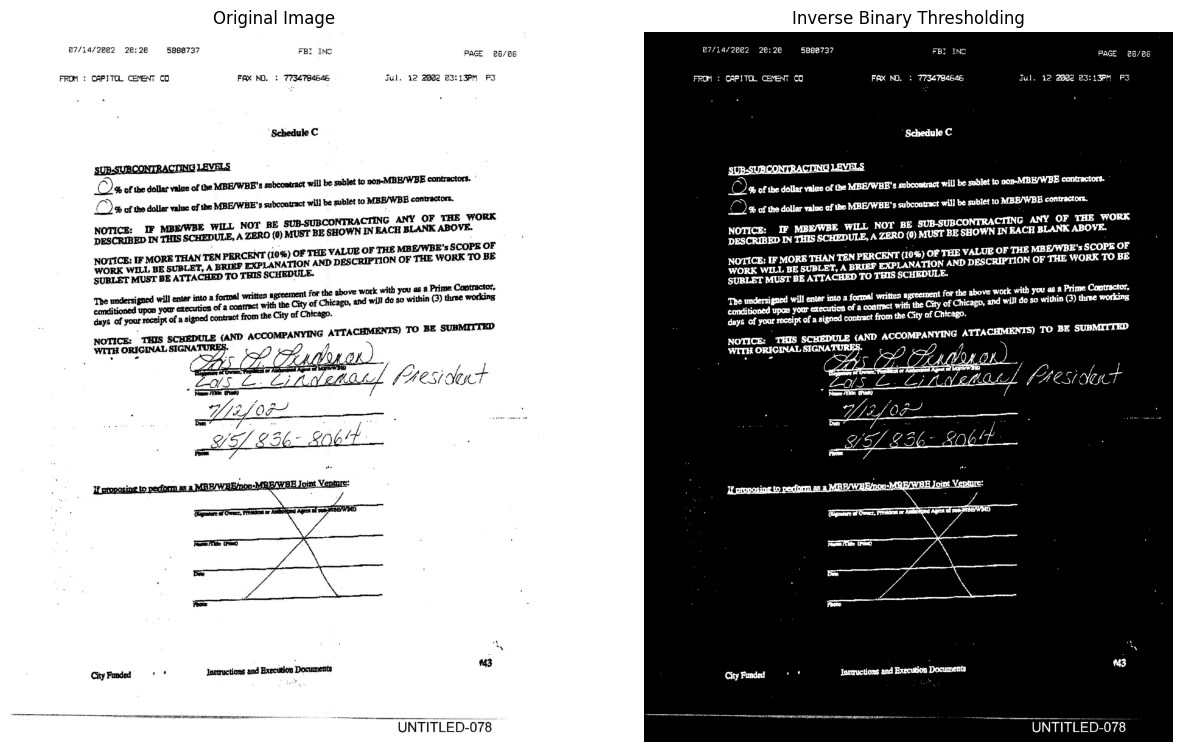

In [96]:
_, bin_inv = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Inverse Binary Thresholding')
plt.imshow(bin_inv, cmap='gray')
plt.axis('off')

plt.show()

### cv.THRESH_TRUNC

The `cv.THRESH_TRUNC` method sets picels values above the threshold to the valueitself, while pixel values below the threshold remain unchanged, truncating the higher values.

#### Parameters:
- **src**: Input grayscale image.
- **dst**: Output image.
- **T**: Threshold value. Pixels with values greater than \(T\) will be truncated to \(T\).

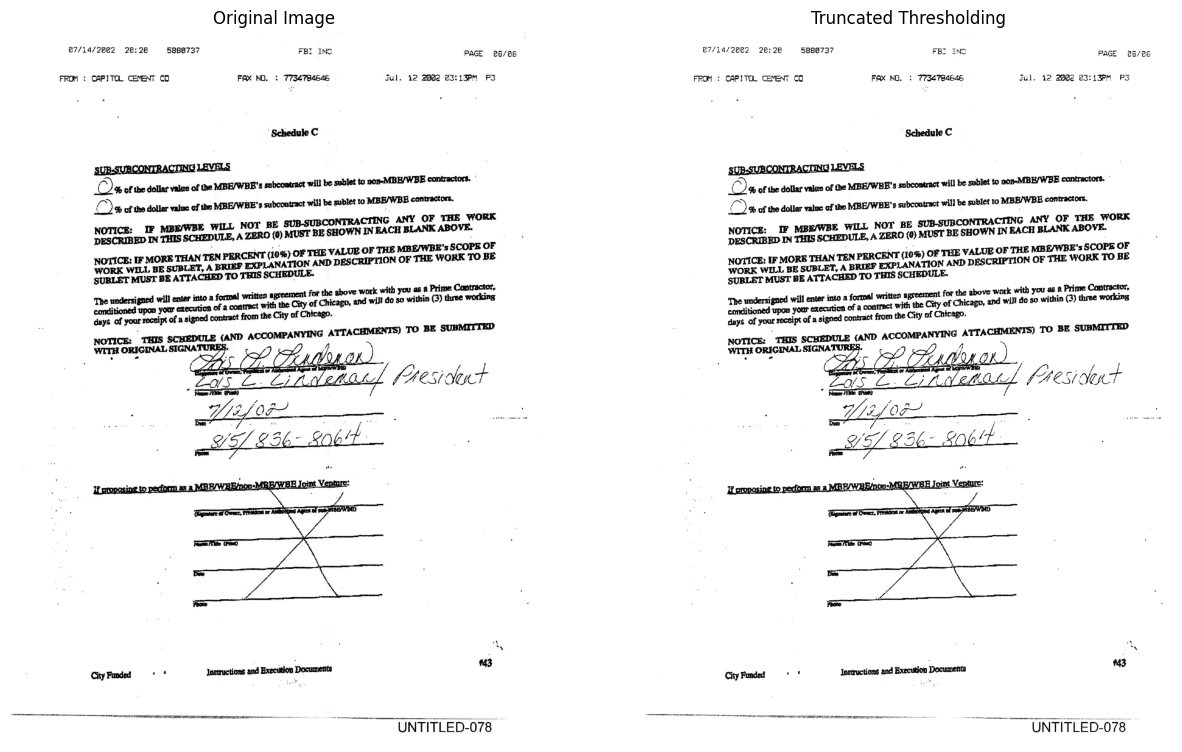

In [97]:
_, truncated = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)

plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Truncated Thresholding')
plt.imshow(truncated, cmap='gray')
plt.axis('off')

plt.show()

### cv.THRESH_TOZERO

The `cv.THRESH_TOZERO` will set all pixel values below the threshold to 0, while all values above threshold remain unchanged.

#### Parameters:
- **src**: Input grayscale image.
- **dst**: Output binary image.
- **T**: Threshold value. Pixels with values below \(T\) will be set to 0.

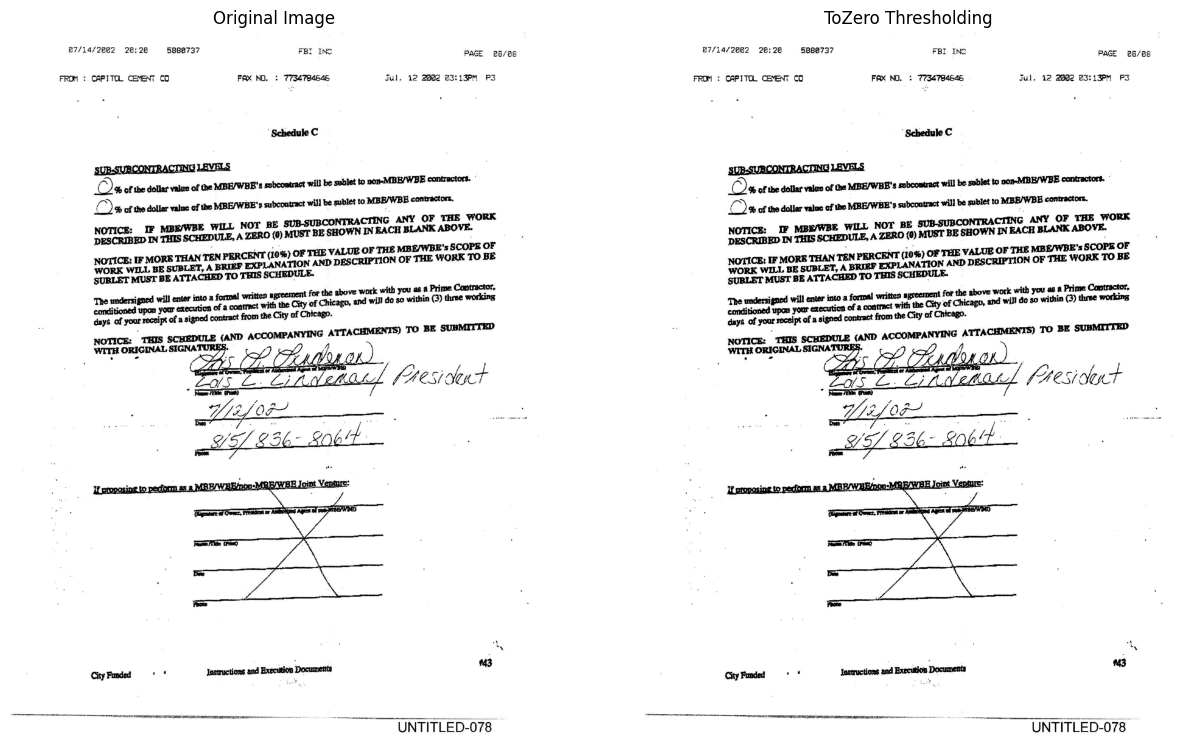

In [98]:
_, tozero = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)

plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('ToZero Thresholding')
plt.imshow(tozero, cmap='gray')
plt.axis('off')

plt.show()

### THRESH_TOZERO_INV

THe `cv.THRESH_TOZERO_INV` sets all pixel values above the threshold to zero, while all below remain unchanged.

#### Parameters:
- **src**: Input grayscale image.
- **dst**: Output binary image.
- **T**: Threshold value. Pixels with values above \(T\) will be set to 0.


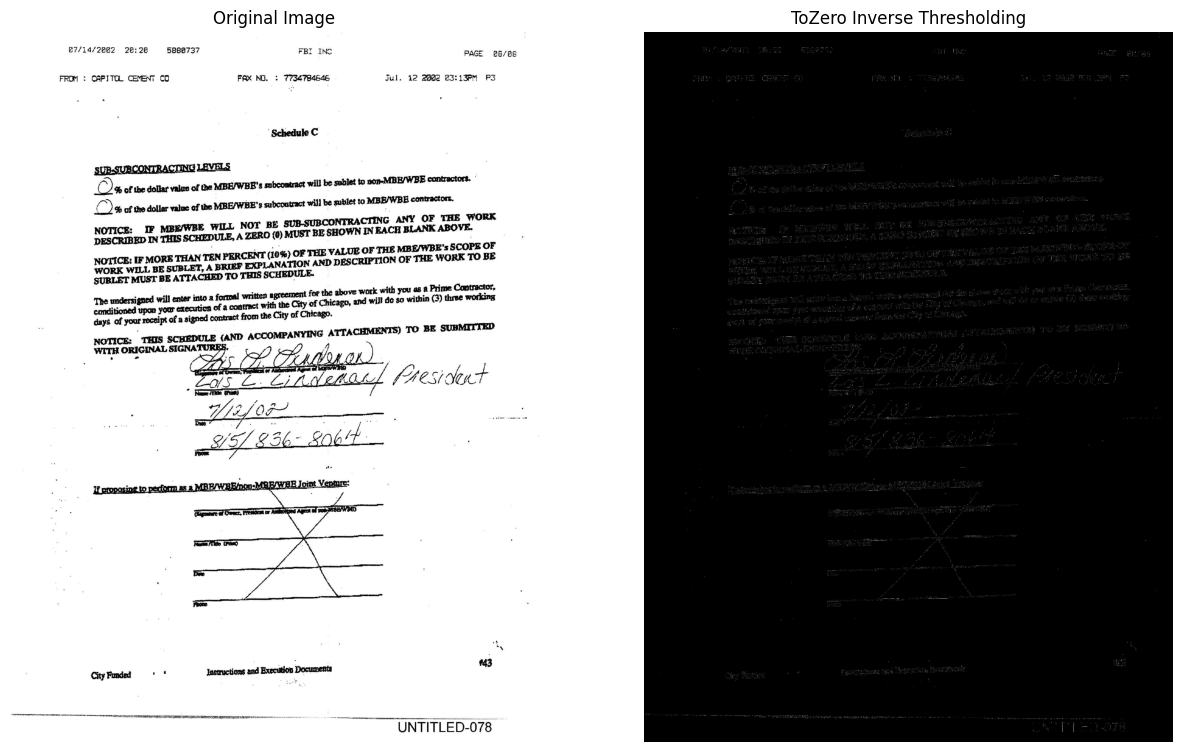

In [99]:
_, tozero_inv = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)

plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('ToZero Inverse Thresholding')
plt.imshow(tozero_inv, cmap='gray')
plt.axis('off')

plt.show()

## Adaptive Thresholding

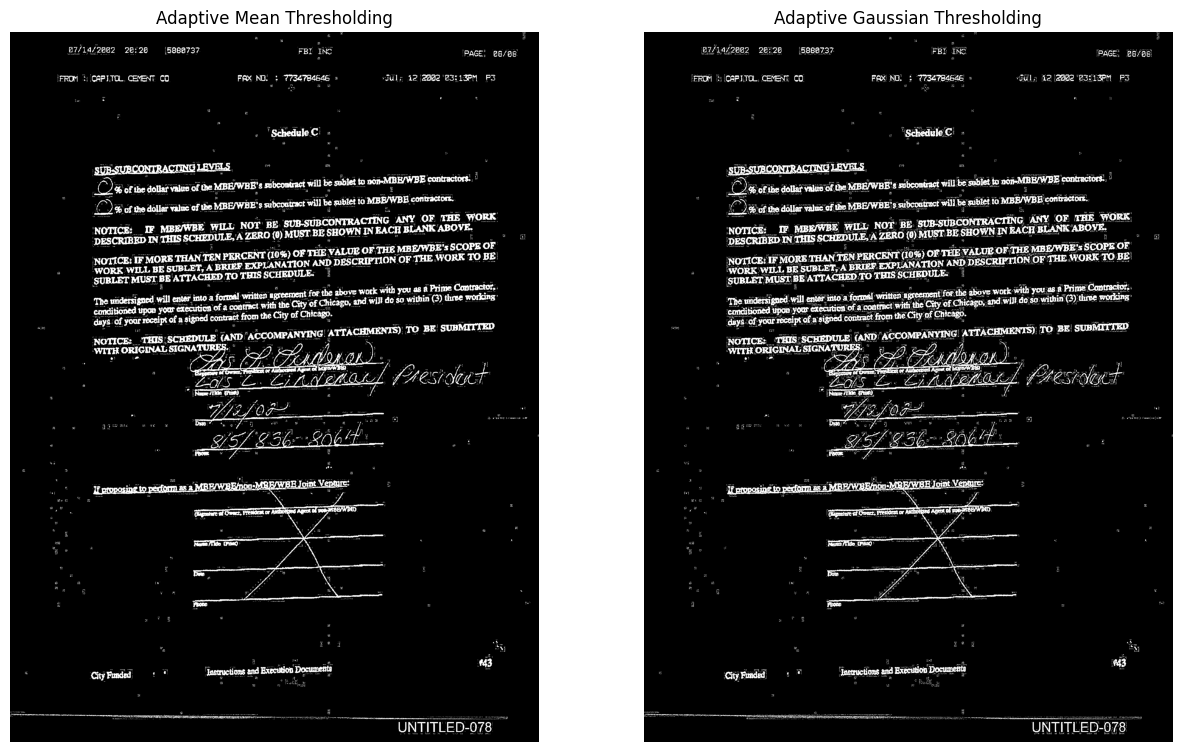

In [100]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)

adaptive_mean = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
adaptive_gaussian = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

plt.figure(figsize=(15, 12))
plt.subplot(1, 2, 1)
plt.title('Adaptive Mean Thresholding')
plt.imshow(adaptive_mean, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Adaptive Gaussian Thresholding')
plt.imshow(adaptive_gaussian, cmap='gray')
plt.axis('off')

plt.show()


## Otsu's Binarization

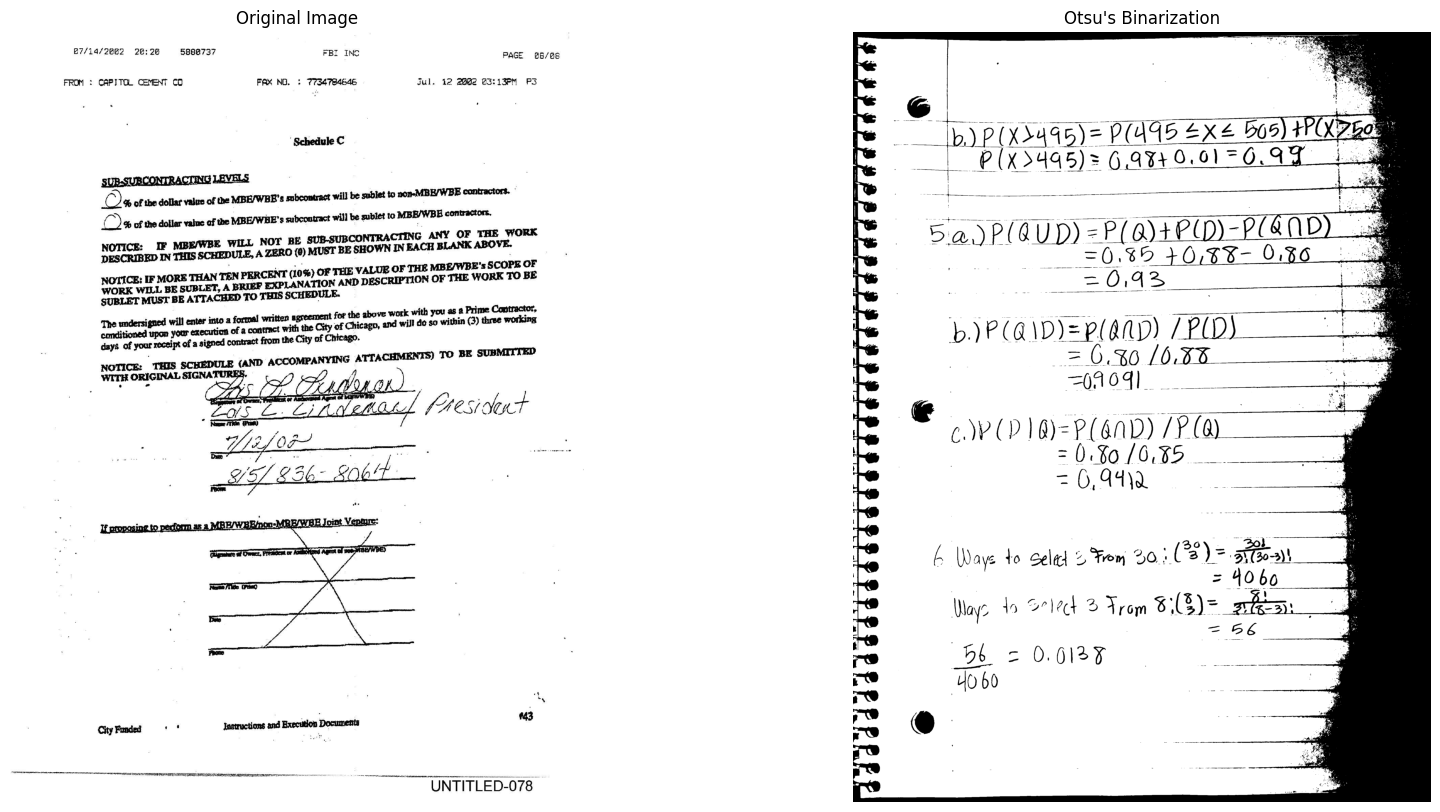

In [101]:
image = cv2.imread(path_to_image, cv2.IMREAD_GRAYSCALE)

ret2,th2 = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# Display the results
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Otsu\'s Binarization')
plt.imshow(th3, cmap='gray')
plt.axis('off')

plt.show()